In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [5]:
# Load Dataset
df = pd.read_csv(r"C:\Users\gmadh\Desktop\task 2\car data.csv")



In [6]:
# Display dataset information
print(df.head())  # Show first few rows
print(df.info())  # Show data types and missing values
print(df.describe())  # Summary statistics


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [7]:
# Drop "Car_Name" since it's not useful for price prediction
df.drop(columns=["Car_Name"], inplace=True)

In [8]:
# Convert categorical variables using One-Hot Encoding
df = pd.get_dummies(df, columns=["Fuel_Type", "Selling_type", "Transmission"], drop_first=True)


In [9]:
# Define Features & Target
X = df.drop(columns=["Selling_Price"])  # Features
y = df["Selling_Price"]  # Target variable


In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Train Machine Learning Model (Random Forest)
# Standardizing numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.6020245901639346
Root Mean Squared Error (RMSE): 0.9159723964091963
R² Score: 0.9635778536357699


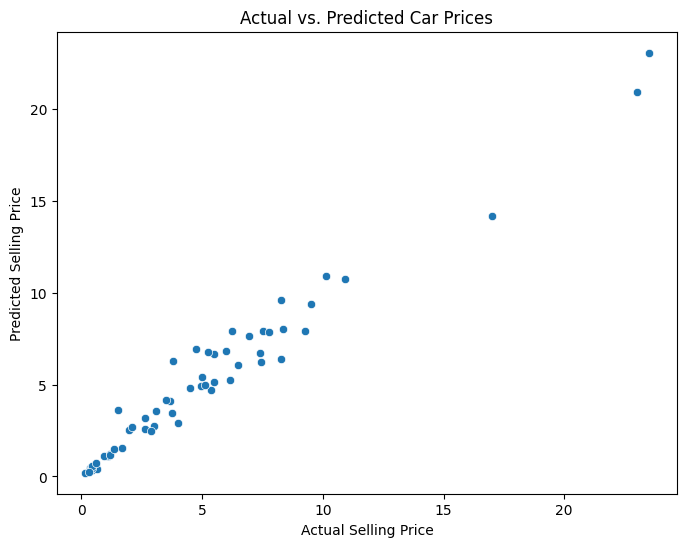

In [12]:
#Visualizing Predictions
# Plot actual vs. predicted prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Car Prices")
plt.show()
